<a href="https://colab.research.google.com/github/Mustasheep/EDA_titanic/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

**Dataset:**

Vamos utilizar um dataset chamado "Titanic". Este dataset é clássico e contém informações sobre os passageiros do navio Titanic, incluindo se eles sobreviveram ou não ao naufrágio.

**Variáveis:**

*   **PassengerId:** Identificador único do passageiro.
*   **Survived:** Indica se o passageiro sobreviveu (1) ou não (0).
*   **Pclass:** Classe do passageiro (1 = primeira classe, 2 = segunda classe, 3 = terceira classe).
*   **Name:** Nome do passageiro.
*   **Sex:** Sexo do passageiro (male ou female).
*   **Age:** Idade do passageiro.
*   **SibSp:** Número de irmãos/cônjuges a bordo do Titanic.
*   **Parch:** Número de pais/filhos a bordo do Titanic.
*   **Ticket:** Número do ticket.
*   **Fare:** Tarifa paga pelo passageiro.
*   **Cabin:** Número da cabine.
*   **Embarked:** Porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton).

# Objetivos
1.  **Carregamento e Inspeção Inicial:**
    *   Carregar o dataset usando Pandas.
    *   Exibir as primeiras e últimas linhas do dataset.
    *   Verificar o tamanho do dataset (número de linhas e colunas).
    *   Exibir informações sobre os tipos de dados e valores não nulos.
2.  **Estatísticas Descritivas:**
    *   Calcular as estatísticas descritivas para as variáveis numéricas (média, mediana, desvio padrão, mínimo, máximo, quartis).
    *   Calcular a contagem de valores para as variáveis categóricas (sexo, classe, porto de embarque).
3.  **Análise de Valores Ausentes:**
    *   Identificar as colunas com valores ausentes.
    *   Decidir como lidar com os valores ausentes (preencher com a média, mediana, remover as linhas, etc.). Justificar sua escolha.
4.  **Visualização de Dados:**
    *   Criar histogramas para as variáveis numéricas (idade, tarifa).
    *   Criar gráficos de barras para as variáveis categóricas (sexo, classe, porto de embarque, sobreviventes).
    *   Criar um gráfico de dispersão para relacionar duas variáveis numéricas (idade e tarifa, por exemplo).
    *   Criar boxplots para comparar a distribuição de uma variável numérica entre diferentes grupos (idade por sexo, tarifa por classe, etc.).
5.  **Análise de Sobrevivência:**
    *   Determinar a taxa geral de sobrevivência.
    *   Analisar se a taxa de sobrevivência varia entre homens e mulheres.
    *   Analisar se a taxa de sobrevivência varia entre as diferentes classes de passageiros.
    *   Investigar se a idade influencia na taxa de sobrevivência.
    *   Investigar se o porto de embarque influencia na taxa de sobrevivência.
    *   Utilizar gráficos para ilustrar as descobertas.

## Carregamento e Inspeção dos dados

In [ ]:
# Ocultando mensagens do sistema
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import kagglehub
import os

In [ ]:
# Baixando versão atual do dataset
path = kagglehub.dataset_download("brendan45774/test-file")

# Construindo o caminho do dataset para este projeto
file_path = os.path.join(path, 'tested.csv')

# Preparando DataFrame
data = pd.read_csv(file_path)
df = pd.DataFrame(data)
print(f"Quantidade de linhas: {df.shape[0]}")
print(f"Quantidade de colunas: {df.shape[1]}")

Quantidade de linhas: 418
Quantidade de colunas: 12


In [ ]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [ ]:
df.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


O nosso dataset possui 418 variáveis, sendo que nas colunas `Age` , `Fare` e `Cabin` possuem valores ausentes ou nulos.

## Estatísticas Descritivas:

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Observando o resumo estatístico dos dados já podemos identifcar e responder fatores importantes:
- Observando a média, nota-se que sobreviveram cerca de 36% dos passageiros.
- Existem passageiros com idades de 2 meses (bebês) até 76 anos, aproximadamente.
- Alguns passageiros não estão acompanhados de parentescos, outros ja possuem até 9.
- Os valores da tarifa variam bastante, de custos em aproximadamente 8 a 31 (dentro dos quartis).

In [ ]:
# Contagem de valores categóricos
df_categ = df.groupby(['Pclass', 'Sex', 'Embarked']).size().reset_index(name='Contagem').sort_values(by='Contagem', ascending=False)
df_categ

,Pclass,Sex,Embarked,Contagem
15,3,male,S,101
9,2,male,S,52
12,3,female,S,41
4,1,male,S,29
0,1,female,C,28
3,1,male,C,28
13,3,male,C,27
6,2,female,S,26
11,3,female,Q,23
2,1,female,S,21


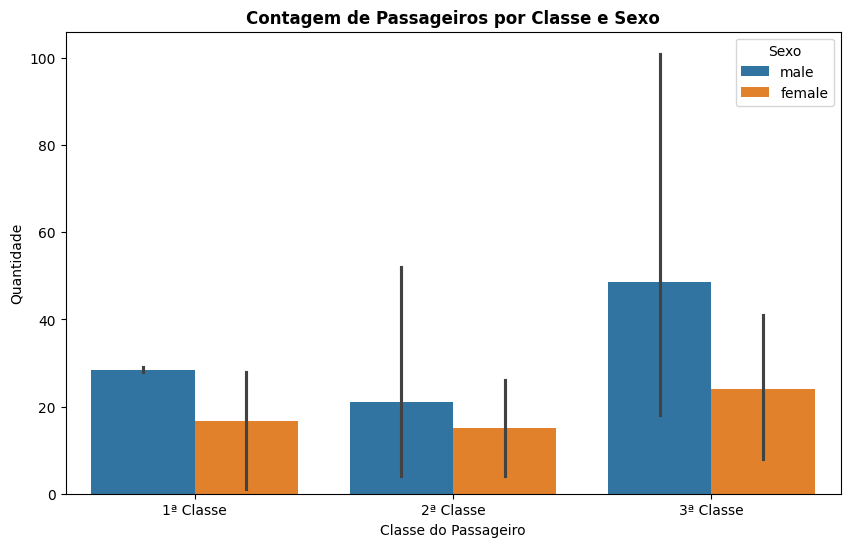

In [ ]:
# Gráfico de barras agrupado
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Pclass', y='Contagem', hue='Sex', data=df_categ)
ax.xaxis.set_ticks([0, 1, 2])
ax.xaxis.set_ticklabels(["1ª Classe", "2ª Classe", "3ª Classe"])
plt.title('Contagem de Passageiros por Classe e Sexo', fontweight='bold')
plt.xlabel('Classe do Passageiro')
plt.ylabel('Quantidade')
plt.legend(title='Sexo')
plt.show()

Podemos notar que possuem mais homens do que mulheres à bordo com uma quantidade significativa de passageiros da 3ª Classe.

O traço preto que saem das barras, indica
 que existe uma discrepância dos dados, uma variância em comparação à média.

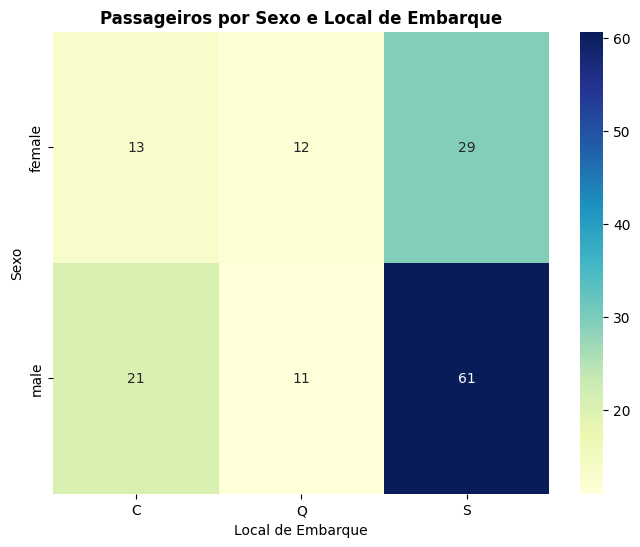

In [ ]:
# Gráfico de mapa de calor
pivot_df = df_categ.pivot_table(index="Sex", columns="Embarked", values="Contagem", fill_value=0)
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title("Passageiros por Sexo e Local de Embarque", fontweight='bold')
plt.xlabel("Local de Embarque")
plt.ylabel("Sexo")
plt.show()

Ressaltando que:
- Embarked: Porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton).

Podemos identificar que:
- A maior parte dos passageiros embarcaram de `Southampton`.
- Poucos passageiros embarcaram de `Queenstown`.
- Existe uma grande quantidade de homens a bordo.

## Análise de Valores Ausentes

In [ ]:
valores_nulos = df.isna().sum()
valores_nulos

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Com todas as informações acima, podemos observar que existem dados ausentes nas colunas `Age` , `Fare` e `Cabin`.

- Iremos utilizar a mediana da coluna `Age` para preencher os dados ausentes.
- Para a coluna `Fare`, por ser numérica e possuir apenas um valor ausente, substituir por 0 já será o necessário.
- Por fim, quanto à coluna `Cabin` , irei dropá-la por completo.

In [ ]:
# Tratando os dados
df["Age"] = df['Age'].fillna(df['Age'].median())
df["Fare"] = df['Fare'].fillna(0)
df = df.drop('Cabin', axis=1)

In [ ]:
# Porcentagem de valores faltantes
print(((df.isnull().sum() / df.shape[0]) * 100).sort_values(ascending=False))

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64


Com os dados atualizados e limpos, podemos prosseguir com algumas análises mais profundas e detalhadas.

## Visualização dos dados

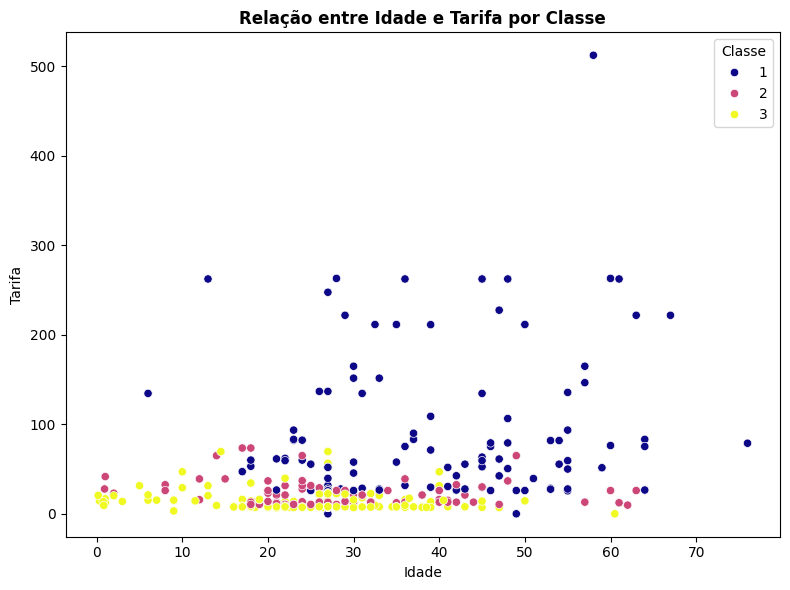

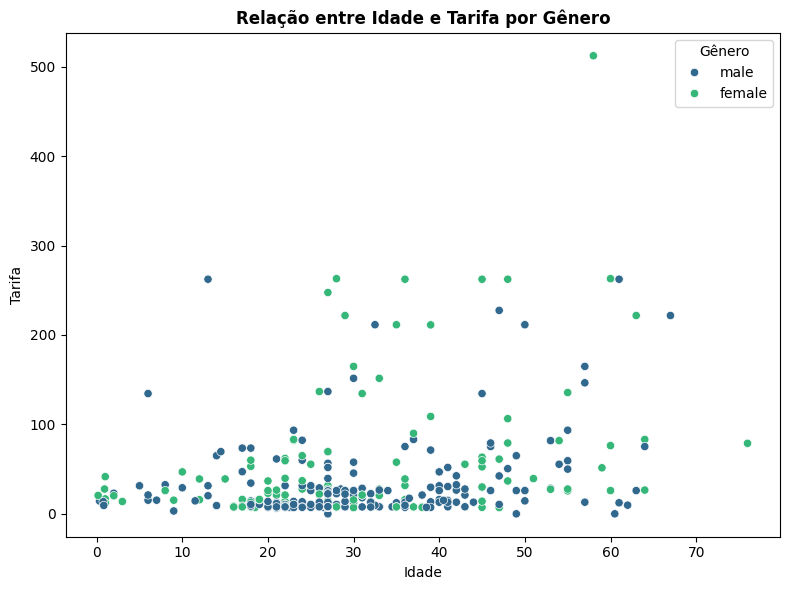

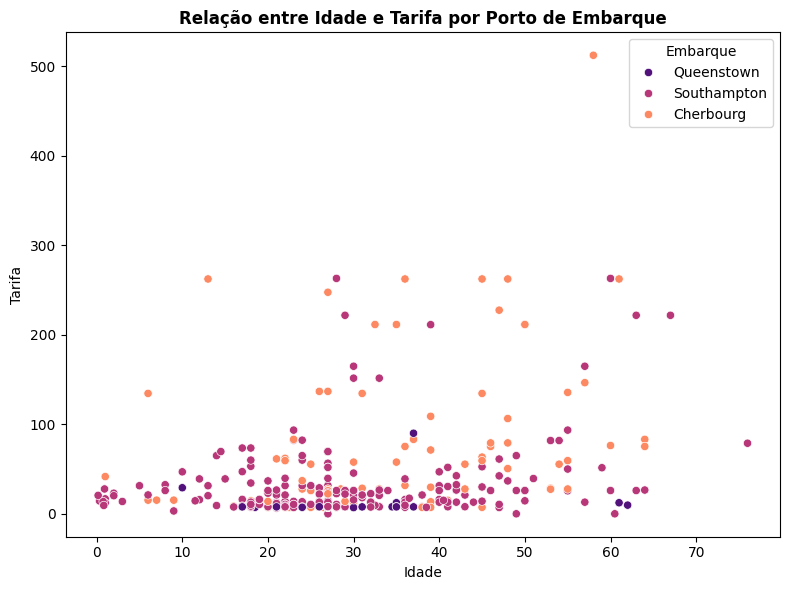

In [ ]:
# Gráfico 1: Relação entre Idade e Tarifa por Classe
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', hue='Pclass', data=df, palette='plasma')
plt.title('Relação entre Idade e Tarifa por Classe', fontweight='bold')
plt.xlabel('Idade')
plt.ylabel('Tarifa')
plt.legend(title='Classe')
plt.tight_layout()

# Gráfico 2: Relação entre Idade e Tarifa por Gênero
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', hue='Sex', data=df, palette='viridis')
plt.title('Relação entre Idade e Tarifa por Gênero', fontweight='bold')
plt.xlabel('Idade')
plt.ylabel('Tarifa')
plt.legend(title='Gênero')
plt.tight_layout()

# Gráfico 3: Relação entre Idade e Tarifa por Porto de Embarque
plt.figure(figsize=(8, 6))
embarked_labels = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}
scatter = sns.scatterplot(x='Age', y='Fare', hue='Embarked', data=df, palette='magma')
plt.title('Relação entre Idade e Tarifa por Porto de Embarque', fontweight='bold')
plt.xlabel('Idade')
plt.ylabel('Tarifa')
plt.legend(title='Embarque')
handles, _ = scatter.get_legend_handles_labels()
legend = plt.legend(handles, [embarked_labels[label] for label in df['Embarked'].unique()], title='Embarque')
plt.tight_layout()

plt.show()

Com esses gráficos, podemos notar que a maior influência no custo das tarifas estão relacionados à classe escolhida (sendo a 1ª Classe mais cara).

  Não existem relações baseadas no gênero e ao porto de embarque, mas pode-se observar que quase nenhum passageiro de `Queenstown` adquiriu um assento de 1ª Classe.

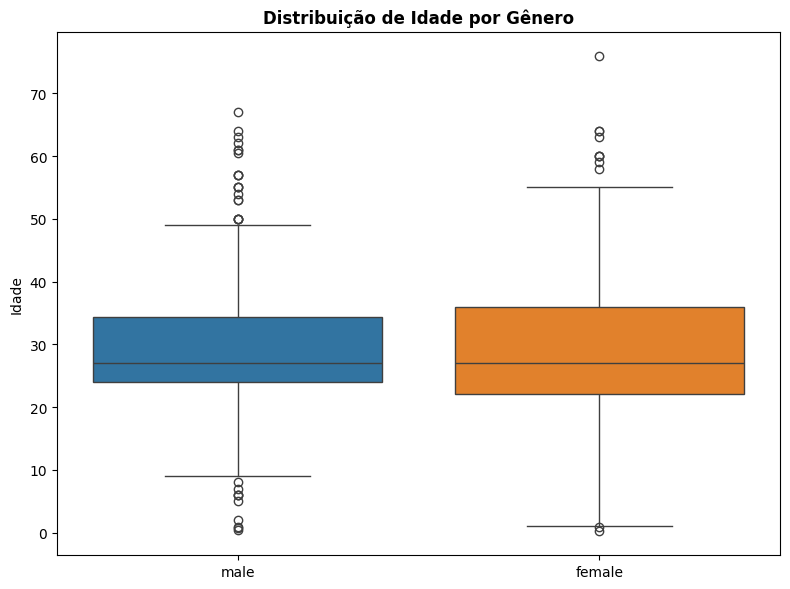

In [ ]:
# Gráfico boxplots para comparar idade por gênero
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='Age', hue='Sex', data=df)
plt.title('Distribuição de Idade por Gênero', fontweight='bold')
plt.xlabel('')
plt.ylabel('Idade')
plt.tight_layout()
plt.show()

Levando em consideração apenas os quartis e excluindo os outliers, temos uma faixa etária de:
- Homens de 10 anos à 50 anos
- Mulheres desde bebês até idosas.

## Análise de Sobrevivência:

Perguntas à serem respondidas:

- Qual a taxa geral de sobrevivência?
- A taxa de sobrevivência varia entre homens e mulheres?
- A taxa de sobrevivência varia entre as diferentes classes de passageiros?
- A idade influencia na taxa de sobrevivência?

In [ ]:
# Taxa geral de sobrevivencia
sobreviventes = df['Survived'].sum()
total_passageiros = len(df)
taxa_sobrevivencia = (sobreviventes / total_passageiros) * 100

# Taxa de sobrevivência por gênero
sobreviventes_por_genero = df.groupby('Sex')['Survived'].sum()
total_por_genero = df['Sex'].value_counts()
taxa_sobrevivencia_por_genero = (sobreviventes_por_genero / total_por_genero) * 100

# Taxa de sobreviência por classe
sobreviventes_por_classe = df.groupby('Pclass')['Survived'].sum()
total_por_classe = df['Pclass'].value_counts()
taxa_sobrevivencia_por_classe = (sobreviventes_por_classe / total_por_classe) * 100

print(f"➔ Taxa de Sobrevivência Geral: {taxa_sobrevivencia:.2f}%")
print(f"\n➔ Taxa de Sobrevivência por Gênero em %:\n{taxa_sobrevivencia_por_genero}")
print(f"\n➔ Taxa de Sobrevivência por Classe em %:\n{taxa_sobrevivencia_por_classe}")

➔ Taxa de Sobrevivência Geral: 36.36%

➔ Taxa de Sobrevivência por Gênero em %:
Sex
female    100.0
male        0.0
dtype: float64

➔ Taxa de Sobrevivência por Classe em %:
Pclass
1    46.728972
2    32.258065
3    33.027523
dtype: float64


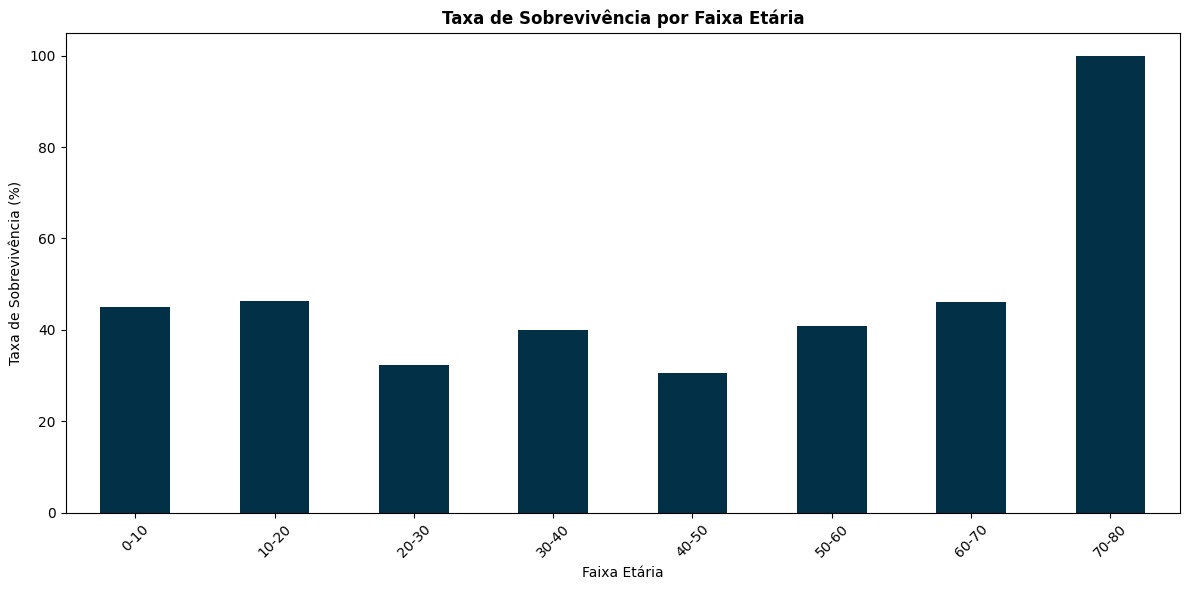

In [ ]:
# Agrupando as idades em intervalos para evitar espalhamento
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


# Taxa de sobrevivência por faixa etária
sobreviventes_por_faixa_etaria = df.groupby('Age_Group')['Survived'].sum()
total_por_faixa_etaria = df['Age_Group'].value_counts()
taxa_sobrevivencia_por_faixa_etaria = (sobreviventes_por_faixa_etaria / total_por_faixa_etaria) * 100

# Criando o Gráfico
plt.figure(figsize=(12, 6))
taxa_sobrevivencia_por_faixa_etaria.sort_index().plot(kind='bar', color='#023047')
plt.title('Taxa de Sobrevivência por Faixa Etária', fontweight='bold')
plt.xlabel('Faixa Etária')
plt.ylabel('Taxa de Sobrevivência (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Conclusão

Podemos concluir e com as seguintes informações:

**Análise Descritiva:**

*   **Idades:** Havia uma ampla faixa etária entre os passageiros, desde bebês até idosos de 76 anos.
*   **Tarifas:** Os valores das tarifas pagas pelos passageiros variavam bastante, com um intervalo considerável entre os menores e maiores valores.
*   **Sobrevivência:** A taxa de sobrevivência média foi de aproximadamente 36%.
*   **Classes:** Havia uma quantidade maior de passageiros da 3ª classe em comparação com as outras classes.

**Visualização de Dados:**

*   **Relação Classe e Tarifa:** A tarifa parece estar fortemente relacionada à classe da cabine, com passageiros da 1ª classe pagando as tarifas mais altas.
*   **Gênero e Tarifa:** A relação entre gênero e tarifa não parece ser tão forte quanto a relação entre classe e tarifa.
*   **Embarque e Tarifa:** Os passageiros de Cherbourg tendiam a pagar mais caro que os de Southampton e Queenstown.
*   **Distribuição de Idade por Gênero:** Observa-se que a mediana de idade dos homens é ligeiramente superior à das mulheres, e que há uma concentração maior de homens entre os 20 e 40 anos. No geral, a faixa etária de ambos é bem similar.

**Sobrevivência:**

*   **Sobrevivência por Classe:** A taxa de sobrevivência foi maior para os passageiros da 1ª classe, seguido pelos da 2ª e 3ª classes.
*   **Sobrevivência por Gênero:** As mulheres foram as únicas sobreviventes.
*   **Sobrevivência por Faixa Etária:** Os dados sugerem que as faixas etárias de bebês e crianças (0-20) e idosos (60-80) apresentaram taxas de sobrevivência mais elevadas, o que pode indicar um esforço para priorizar essas faixas na hora do resgate.

**Implicações:**

*   **Classe Social:** A classe social teve uma influência significativa tanto no custo da passagem como nas chances de sobrevivência.
*   **Gênero:** A priorização de mulheres e crianças no resgate pode ser evidente, dado que nenhuma sobrevivência masculina foi observada no dataset.
*   **Porto de Embarque:** As pessoas que embarcaram em Queenstown quase não adquiriram assentos na 1ª classe, provavelmente pela classe social da população daquela cidade à época.